In [4]:
# Importacao de pacotes
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from ising2d import *

# Configuracoes de plot para o relatorio
plt.rcParams['figure.dpi'] = 72*2
plt.rcParams['figure.figsize'] = (0.7*5.95114, 0.7*5.95114)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['lines.linewidth'] = 1

np.seterr(divide = 'ignore', invalid = 'ignore'); # ignora warnings sobre divisao por zero (no calculo da probabilidade de flipar os spins para T = 0)

## Versao interativa da simulacao

In [4]:
# Inicializacao das variaveis da simulacao
L = 100 # largura do grid de spins
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo
Nsteps = 2000 # numero de passos de Monte Carlo da simulacao
T = 1 # temperatura da simulacao (kB = 1)

start = choice([-1, +1], (L, L)) # configuracao inicial dos spins (aleatoria)
steps = [start] # vetor de arrays de spins para cada passo de Monte Carlo
for k in range(Nsteps):
    steps.append(ising_step(steps[-1].copy(), T, J, h))

display_ising_sequence(steps);

interactive(children=(IntSlider(value=1000, description='step', max=2000), Output()), _dom_classes=('widget-in…

### Figuras dos estados inicial e final para a simulacao anterior

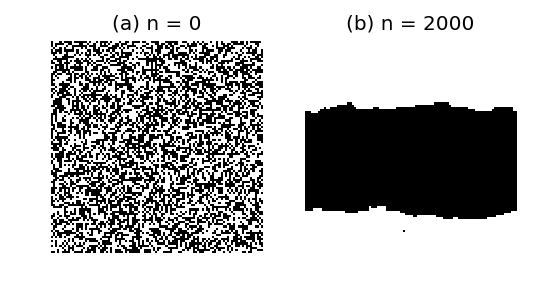

In [13]:
fig, axes = plt.subplots(ncols = 2)
axes[0].imshow(steps[0], cmap = 'binary')
axes[0].axis('off')
axes[0].set_title('(a) n = {:d}'.format(0), fontsize = 10)

axes[1].imshow(steps[-1], cmap = 'binary')
axes[1].axis('off')
axes[1].set_title('(b) n = {:d}'.format(Nsteps), fontsize = 10)

plt.savefig('../relatorio/img/evolucao-grid-100x100.eps', format = 'eps', dpi = 300)
plt.show()

## Graficos da evolucao da magnetizacao por sitio e da energia por sitio a cada passo de Monte Carlo

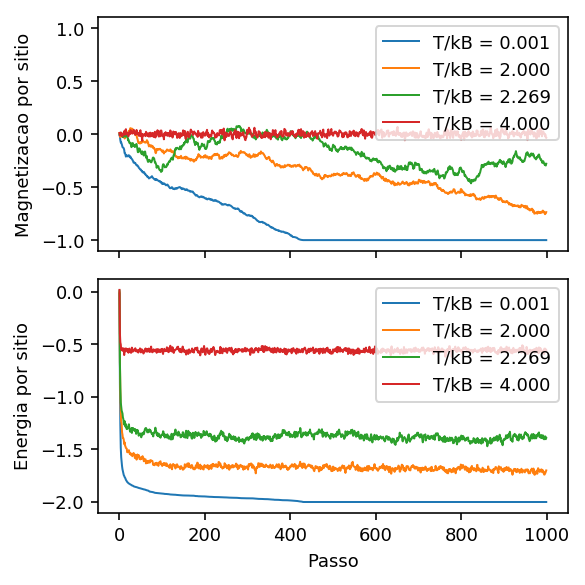

In [18]:
L = 100 # largura do grid de spins
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo
TC = 2*J/np.log(1 + np.sqrt(2)) # temperatura critica (solucao analitica)
vecT = [0.001, 2, TC, 4] # temperaturas das curvas
Nsteps = 1000 # numero de passos de Monte Carlo da simulacao

fig, axes = plt.subplots(nrows = 2, sharex = True)
axes[0].set_ylabel('Magnetizacao por sitio')
axes[0].set_ylim(-1.1, 1.1)
axes[1].set_xlabel('Passo')
axes[1].set_ylabel('Energia por sitio')

for T in vecT:
    m = np.zeros(Nsteps) # vetor de magnetizacoes de cada passo de Monte Carlo
    e = np.zeros(Nsteps) # vetor de energias de cada passo de Monte Carlo

    steps = [choice([-1, +1], (L, L))] # vetor de arrays de spins para cada passo de Monte Carlo
    for k in range(Nsteps):
        steps.append(ising_step(steps[-1].copy(), T, J, h))
        m[k] = magnetization_per_site(steps[k])
        e[k] = energy_per_site(steps[k], J, h)

    axes[0].plot(m, label = 'T/kB = {:.3f}'.format(T))
    axes[1].plot(e, label = 'T/kB = {:.3f}'.format(T))

axes[0].legend(loc = 'best')
axes[1].legend(loc = 'best')
plt.tight_layout()

plt.savefig('../relatorio/img/evolucao-mc-temperaturas.eps', format = 'eps', dpi = 300)
plt.show()

## Graficos da evolucao da magnetizacao por sitio e da energia por sitio em funcao da temperatura para varias larguras

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in sinh


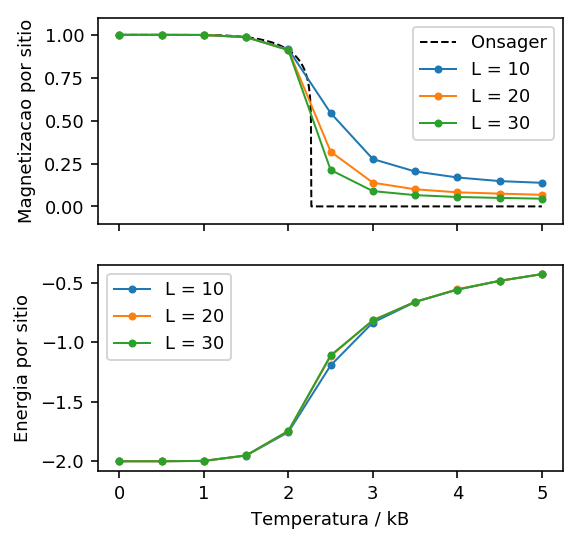

In [40]:
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo
TC = 2*J/np.log(1 + np.sqrt(2)) # temperatura critica (solucao analitica)
Tmin = 1e-17 # temperatura proxima de zero
Tmax = 5 # temperatura maxima
DeltaT = 0.5 # passo em temperaturas
T = np.arange(Tmin, Tmax + DeltaT, DeltaT)
NT = len(T)
vecL = [10, 20, 30] # tamanho do array de spins
vecNsteps = [5000, 10000, 15000] # numero de passos de Monte Carlo
vectrans = [1000, 2000, 3000] # tamanho do transiente a ser removido em numero de passos

# Plot da funcao exata (solucao de Onsager)
linT = np.linspace(Tmin, Tmax, 1000, endpoint = True)
mexact = np.zeros(len(linT), dtype = np.float128) # solucao exata
for k in range(len(linT)):
    if linT[k] < TC:
        mexact[k] = (1 - np.sinh(2*J/linT[k])**(-4))**(1/8)

fig, axes = plt.subplots(nrows = 2, sharex = True)
axes[0].set_ylabel('Magnetizacao por sitio')
axes[0].set_ylim(-0.1, 1.1)
axes[1].set_xlabel('Temperatura / kB')
axes[1].set_ylabel('Energia por sitio')

axes[0].plot(linT, mexact, 'k--', label = 'Onsager')

# Obtem curvas de magnetizacao e energia por temperatura para alguns tamanhos de grid
for L, Nsteps, ntrans in zip(vecL, vecNsteps, vectrans):
    m = np.zeros(NT) # vetor de magnetizacoes medias de cada temperatura
    e = np.zeros(NT) # vetor de energias medias de cada temperatura

    for k in range(NT):
        thism = np.zeros(Nsteps) # vetor de magnetizacoes de cada passo de Monte Carlo
        thise = np.zeros(Nsteps) # vetor de energias de cada passo de Monte Carlo

        steps = [choice([-1, +1], (L, L))] # vetor de arrays de spins para cada passo de Monte Carlo
        for n in range(Nsteps):
            steps.append(ising_step(steps[-1].copy(), T[k], J, h))
            thism[n] = magnetization_per_site(steps[n])
            thise[n] = energy_per_site(steps[n], J, h)

            m[k] = np.mean(np.abs(thism[ntrans:]))
            e[k] = np.mean(thise[ntrans:])

    axes[0].plot(T, m, '-o', markersize = 3, label = 'L = {:d}'.format(L))
    axes[1].plot(T, e, '-o', markersize = 3, label = 'L = {:d}'.format(L))

axes[0].legend(loc = 'best')
axes[1].legend(loc = 'best')

plt.savefig('../relatorio/img/simulacao-3-larguras.eps', format = 'eps', dpi = 300)

plt.show()

## Graficos da evolucao da magnetizacao por sitio e da energia por sitio para cada passo de Monte Carlo com h = 1

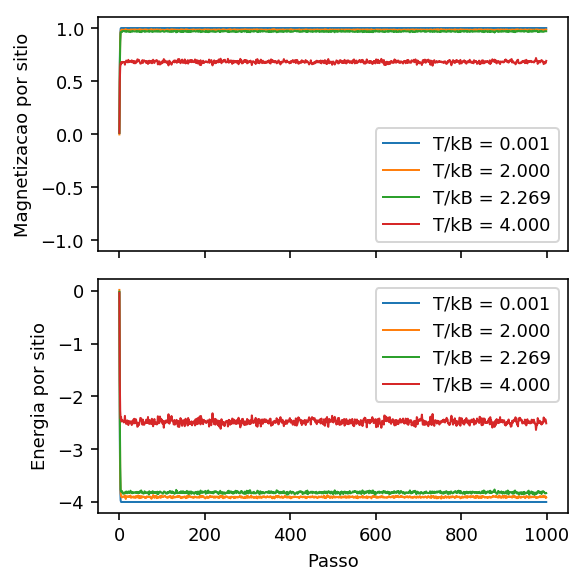

In [29]:
L = 100 # largura do grid de spins
J = 1 # constante de interacao entre os spins
h = 1 # constante de interacao do spin com o campo magnetico externo
TC = 2*J/np.log(1 + np.sqrt(2)) # temperatura critica (solucao analitica)
vecT = [0.001, 2, TC, 4] # temperaturas das curvas
Nsteps = 1000 # numero de passos de Monte Carlo da simulacao

fig, axes = plt.subplots(nrows = 2, sharex = True)
axes[0].set_ylabel('Magnetizacao por sitio')
axes[0].set_ylim(-1.1, 1.1)
axes[1].set_xlabel('Passo')
axes[1].set_ylabel('Energia por sitio')

for T in vecT:
    m = np.zeros(Nsteps) # vetor de magnetizacoes de cada passo de Monte Carlo
    e = np.zeros(Nsteps) # vetor de energias de cada passo de Monte Carlo

    steps = [choice([-1, +1], (L, L))] # vetor de arrays de spins para cada passo de Monte Carlo
    for k in range(Nsteps):
        steps.append(ising_step(steps[-1].copy(), T, J, h))
        m[k] = magnetization_per_site(steps[k])
        e[k] = energy_per_site(steps[k], J, h)

    axes[0].plot(m, label = 'T/kB = {:.3f}'.format(T))
    axes[1].plot(e, label = 'T/kB = {:.3f}'.format(T))

axes[0].legend(loc = 'best')
axes[1].legend(loc = 'best')
plt.tight_layout()

plt.savefig('../relatorio/img/evolucao-h=1-mc-temperaturas.eps', format = 'eps', dpi = 300)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in sinh


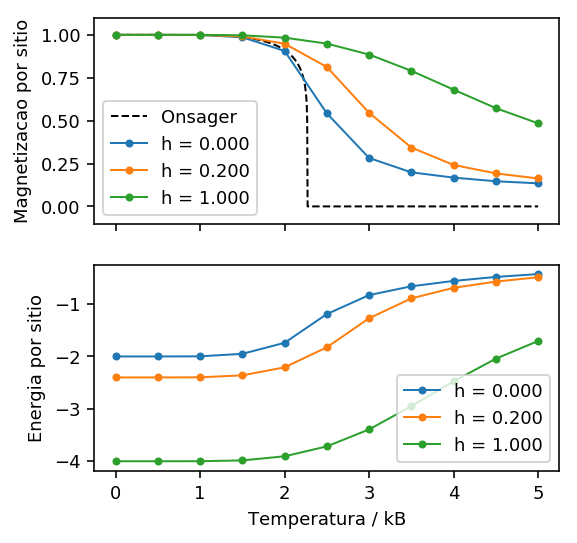

In [5]:
J = 1 # constante de interacao entre os spins
vech = [0, 0.2, 1] # constante de interacao do spin com o campo magnetico externo
TC = 2*J/np.log(1 + np.sqrt(2)) # temperatura critica (solucao analitica)
Tmin = 1e-17 # temperatura proxima de zero
Tmax = 5 # temperatura maxima
DeltaT = 0.5 # passo em temperaturas
T = np.arange(Tmin, Tmax + DeltaT, DeltaT)
NT = len(T)
L = 10 # tamanho do array de spins
Nsteps = 20000 # numero de passos de Monte Carlo
trans = 1000 # tamanho do transiente a ser removido em numero de passos

# Plot da funcao exata (solucao de Onsager)
linT = np.linspace(Tmin, Tmax, 1000, endpoint = True)
mexact = np.zeros(len(linT), dtype = np.float128) # solucao exata
for k in range(len(linT)):
    if linT[k] < TC:
        mexact[k] = (1 - np.sinh(2*J/linT[k])**(-4))**(1/8)

fig, axes = plt.subplots(nrows = 2, sharex = True)
axes[0].set_ylabel('Magnetizacao por sitio')
axes[0].set_ylim(-0.1, 1.1)
axes[1].set_xlabel('Temperatura / kB')
axes[1].set_ylabel('Energia por sitio')

axes[0].plot(linT, mexact, 'k--', label = 'Onsager')

# Obtem curvas de magnetizacao e energia por temperatura para alguns tamanhos de grid
for h in vech:
    m = np.zeros(NT) # vetor de magnetizacoes medias de cada temperatura
    e = np.zeros(NT) # vetor de energias medias de cada temperatura

    for k in range(NT):
        thism = np.zeros(Nsteps) # vetor de magnetizacoes de cada passo de Monte Carlo
        thise = np.zeros(Nsteps) # vetor de energias de cada passo de Monte Carlo

        steps = [choice([-1, +1], (L, L))] # vetor de arrays de spins para cada passo de Monte Carlo
        for n in range(Nsteps):
            steps.append(ising_step(steps[-1].copy(), T[k], J, h))
            thism[n] = magnetization_per_site(steps[n])
            thise[n] = energy_per_site(steps[n], J, h)

            m[k] = np.mean(np.abs(thism[trans:]))
            e[k] = np.mean(thise[trans:])

    axes[0].plot(T, m, '-o', markersize = 3, label = 'h = {:.3f}'.format(h))
    axes[1].plot(T, e, '-o', markersize = 3, label = 'h = {:.3f}'.format(h))

axes[0].legend(loc = 3)
axes[1].legend(loc = 'best')

plt.savefig('../relatorio/img/simulacao-h.eps', format = 'eps', dpi = 300)

plt.show()